# **Import Libraries** 


In [2]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import librosa.display
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import IPython.display as ipd
import matplotlib.pyplot as plt 
from sklearn.compose import ColumnTransformer


# **Import Dataset**

In [3]:
dataset = pd.read_csv('train.csv')

In [4]:
print(dataset)

        ID            Class
0        0            siren
1        1     street_music
2        2         drilling
3        3            siren
4        4         dog_bark
...    ...              ...
5430  8725    engine_idling
5431  8726         dog_bark
5432  8727    engine_idling
5433  8728    engine_idling
5434  8729  air_conditioner

[5435 rows x 2 columns]


# Visulaization the set of features 

In [ ]:
import matplotlib.pyplot as plt
filename= 'All_data/0.wav'
Sound, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast')
plt.plot(Sound)

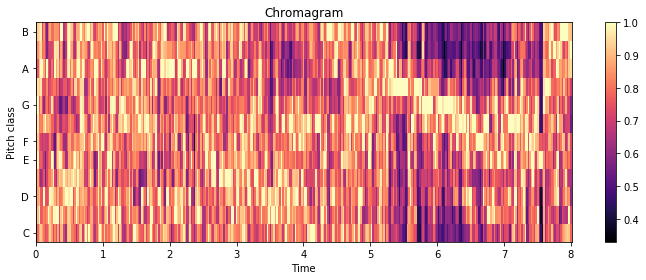

In [245]:
# TO SHOW THE RANDOM WAVE PLOT OF CHROMAGRAM   
stft = np.abs(librosa.stft(Sound))
chroma = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

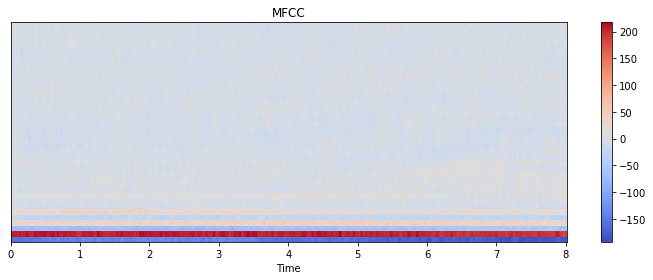

In [246]:
# VISUALIZE THE RANDOM WAVE USING MFCC
mfccs = librosa.feature.mfcc(y=Sound, sr=sample_rate, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

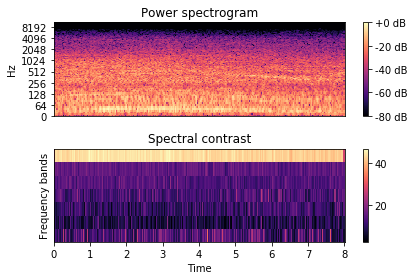

In [247]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(stft,ref=np.max), y_axis='log')
contrast = librosa.feature.spectral_contrast(S=stft, sr=sample_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2)
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')
plt.tight_layout()
plt.show()

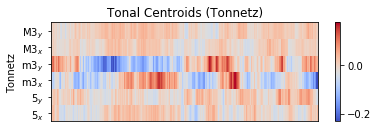

In [250]:
y = librosa.effects.harmonic(Sound)
tonnetz = librosa.feature.tonnetz(y=y, sr=sample_rate)
plt.subplot(2, 1, 1)
librosa.display.specshow(tonnetz, y_axis='tonnetz')
plt.colorbar()
plt.title('Tonal Centroids (Tonnetz)')
plt.show()

# **Extract Features From Audio Files**

In [5]:
# creating a method that include all features extraction we will use such as mfcc , chromastft ,...etc

def extract_features(files):
    
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join(os.path.abspath('Train')+'/'+str(files.ID)+'.wav')

    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))

    # Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    # Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
        
    
    # We add also the classes of each file as a label at the end
    label = files.Class

    return mfccs, chroma, mel, contrast, tonnetz, label

In [8]:
import os
# Applying the function to the train data by accessing each row of the dataframe
features_labels = dataset.apply(extract_features, axis=1)

C:\Users\User-7\AppData\Roaming\Python\Python37\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
C:\Users\User-7\AppData\Roaming\Python\Python37\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [9]:
features_labels

0       ([-82.12359, 139.50592, -42.430866, 24.82786, ...
1       ([-15.744005, 124.119965, -29.42888, 39.447193...
2       ([-123.393654, 15.181949, -50.09333, 7.1418734...
3       ([-213.27881, 89.323586, -55.256187, 12.632098...
4       ([-237.92648, 135.90245, 39.26844, 21.240238, ...
                              ...                        
5430    ([-214.6584, 178.9413, -1.2636192, 63.96228, 6...
5431    ([-395.34592, 105.813354, -0.19629018, -7.0979...
5432    ([-320.81738, 58.300556, -6.8695025, 15.693743...
5433    ([-277.03183, 141.14565, -36.32912, 39.455753,...
5434    ([-290.99673, 233.35156, -4.6723504, 4.6523304...
Length: 5435, dtype: object

#  save the results in a dataframe to be able to access them if needed

In [10]:
features_df = pd.DataFrame(features_labels)
features_df.to_csv('features_df.csv', index=False)

In [15]:
features_df 

0
0     ([-82.12359, 139.50592, -42.430866, 24.82786, ...
1     ([-15.744005, 124.119965, -29.42888, 39.447193...
2     ([-123.393654, 15.181949, -50.09333, 7.1418734...
3     ([-213.27881, 89.323586, -55.256187, 12.632098...
4     ([-237.92648, 135.90245, 39.26844, 21.240238, ...
...                                                 ...
5430  ([-214.6584, 178.9413, -1.2636192, 63.96228, 6...
5431  ([-395.34592, 105.813354, -0.19629018, -7.0979...
5432  ([-320.81738, 58.300556, -6.8695025, 15.693743...
5433  ([-277.03183, 141.14565, -36.32912, 39.455753,...
5434  ([-290.99673, 233.35156, -4.6723504, 4.6523304...

[5435 rows x 1 columns]

# concatenate all the features into one long feature

In [11]:
features = []
for i in range(0, len(features_labels)):
    features.append(np.concatenate((features_labels[i][0], features_labels[i][1], 
                features_labels[i][2], features_labels[i][3],
                features_labels[i][4]), axis=0))

In [12]:
features

[array([-8.21235886e+01,  1.39505920e+02, -4.24308662e+01,  2.48278599e+01,
        -1.16207638e+01,  2.34970837e+01, -1.21945896e+01,  2.58971386e+01,
        -9.40527725e+00,  2.12104301e+01, -7.36882162e+00,  1.42543383e+01,
        -8.67869949e+00,  7.75023842e+00, -1.01241150e+01,  3.25811911e+00,
        -1.13526192e+01,  2.80096865e+00, -7.04601431e+00,  3.91331387e+00,
        -2.33497477e+00,  2.01242256e+00, -2.79394388e+00,  4.12927437e+00,
        -1.62076879e+00,  4.32620144e+00, -1.03440976e+00, -1.23297679e+00,
        -3.11085367e+00,  3.20448577e-01, -1.78778660e+00,  4.42955226e-01,
        -1.79164767e+00, -7.63617873e-01, -1.24246430e+00, -2.76640356e-01,
         6.57185316e-01, -5.02371430e-01, -2.60428572e+00, -1.05346227e+00,
         7.98327327e-01,  8.40953171e-01,  8.19064617e-01,  8.06547999e-01,
         8.25885594e-01,  8.49392772e-01,  8.68582129e-01,  8.25281203e-01,
         8.10258985e-01,  7.72252798e-01,  7.69334197e-01,  7.96988785e-01,
         5.8

In [13]:
#  we create a list where we will store all the labels

labels = []
for i in range(0, len(features_labels)):
    labels.append(features_labels[i][5])

In [14]:
labels

['siren',
 'street_music',
 'drilling',
 'siren',
 'dog_bark',
 'children_playing',
 'street_music',
 'drilling',
 'gun_shot',
 'dog_bark',
 'engine_idling',
 'siren',
 'gun_shot',
 'engine_idling',
 'air_conditioner',
 'air_conditioner',
 'engine_idling',
 'siren',
 'children_playing',
 'jackhammer',
 'gun_shot',
 'siren',
 'jackhammer',
 'street_music',
 'jackhammer',
 'engine_idling',
 'siren',
 'children_playing',
 'jackhammer',
 'engine_idling',
 'air_conditioner',
 'car_horn',
 'drilling',
 'siren',
 'gun_shot',
 'children_playing',
 'children_playing',
 'drilling',
 'gun_shot',
 'siren',
 'car_horn',
 'drilling',
 'street_music',
 'jackhammer',
 'children_playing',
 'dog_bark',
 'dog_bark',
 'street_music',
 'street_music',
 'jackhammer',
 'air_conditioner',
 'dog_bark',
 'jackhammer',
 'gun_shot',
 'jackhammer',
 'street_music',
 'car_horn',
 'street_music',
 'children_playing',
 'car_horn',
 'siren',
 'jackhammer',
 'siren',
 'street_music',
 'dog_bark',
 'jackhammer',
 'air_c

# Encoding Categorical 

In [142]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = np.array(labels)
labels_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse=False)
labels_encoded = labels_encoded.reshape(len(labels_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(labels_encoded)


In [143]:
# each class replace with equivalent integer that integer we will use when we predict classes 
for i in range( 0, len(labels)):
    print(str(labels_encoded[i])+"   the equivalent class  " + str(labels[i])+"   ")
    
  

[8]   the equivalent class  siren   
[9]   the equivalent class  street_music   
[4]   the equivalent class  drilling   
[8]   the equivalent class  siren   
[3]   the equivalent class  dog_bark   
[2]   the equivalent class  children_playing   
[9]   the equivalent class  street_music   
[4]   the equivalent class  drilling   
[6]   the equivalent class  gun_shot   
[3]   the equivalent class  dog_bark   
[5]   the equivalent class  engine_idling   
[8]   the equivalent class  siren   
[6]   the equivalent class  gun_shot   
[5]   the equivalent class  engine_idling   
[0]   the equivalent class  air_conditioner   
[0]   the equivalent class  air_conditioner   
[5]   the equivalent class  engine_idling   
[8]   the equivalent class  siren   
[2]   the equivalent class  children_playing   
[7]   the equivalent class  jackhammer   
[6]   the equivalent class  gun_shot   
[8]   the equivalent class  siren   
[7]   the equivalent class  jackhammer   
[9]   the equivalent class  street_mus

[8]   the equivalent class  siren   
[3]   the equivalent class  dog_bark   
[9]   the equivalent class  street_music   
[9]   the equivalent class  street_music   
[0]   the equivalent class  air_conditioner   
[8]   the equivalent class  siren   
[7]   the equivalent class  jackhammer   
[9]   the equivalent class  street_music   
[3]   the equivalent class  dog_bark   
[8]   the equivalent class  siren   
[9]   the equivalent class  street_music   
[0]   the equivalent class  air_conditioner   
[0]   the equivalent class  air_conditioner   
[0]   the equivalent class  air_conditioner   
[2]   the equivalent class  children_playing   
[1]   the equivalent class  car_horn   
[1]   the equivalent class  car_horn   
[3]   the equivalent class  dog_bark   
[0]   the equivalent class  air_conditioner   
[5]   the equivalent class  engine_idling   
[7]   the equivalent class  jackhammer   
[7]   the equivalent class  jackhammer   
[9]   the equivalent class  street_music   
[5]   the equiv

[8]   the equivalent class  siren   
[4]   the equivalent class  drilling   
[7]   the equivalent class  jackhammer   
[5]   the equivalent class  engine_idling   
[4]   the equivalent class  drilling   
[0]   the equivalent class  air_conditioner   
[0]   the equivalent class  air_conditioner   
[2]   the equivalent class  children_playing   
[8]   the equivalent class  siren   
[0]   the equivalent class  air_conditioner   
[7]   the equivalent class  jackhammer   
[7]   the equivalent class  jackhammer   
[1]   the equivalent class  car_horn   
[7]   the equivalent class  jackhammer   
[1]   the equivalent class  car_horn   
[7]   the equivalent class  jackhammer   
[5]   the equivalent class  engine_idling   
[0]   the equivalent class  air_conditioner   
[7]   the equivalent class  jackhammer   
[8]   the equivalent class  siren   
[4]   the equivalent class  drilling   
[8]   the equivalent class  siren   
[9]   the equivalent class  street_music   
[7]   the equivalent class  ja

[3]   the equivalent class  dog_bark   
[8]   the equivalent class  siren   
[7]   the equivalent class  jackhammer   
[0]   the equivalent class  air_conditioner   
[5]   the equivalent class  engine_idling   
[3]   the equivalent class  dog_bark   
[5]   the equivalent class  engine_idling   
[4]   the equivalent class  drilling   
[9]   the equivalent class  street_music   
[7]   the equivalent class  jackhammer   
[9]   the equivalent class  street_music   
[4]   the equivalent class  drilling   
[1]   the equivalent class  car_horn   
[3]   the equivalent class  dog_bark   
[7]   the equivalent class  jackhammer   
[8]   the equivalent class  siren   
[3]   the equivalent class  dog_bark   
[5]   the equivalent class  engine_idling   
[3]   the equivalent class  dog_bark   
[6]   the equivalent class  gun_shot   
[5]   the equivalent class  engine_idling   
[1]   the equivalent class  car_horn   
[9]   the equivalent class  street_music   
[5]   the equivalent class  engine_idling

[9]   the equivalent class  street_music   
[2]   the equivalent class  children_playing   
[2]   the equivalent class  children_playing   
[7]   the equivalent class  jackhammer   
[7]   the equivalent class  jackhammer   
[3]   the equivalent class  dog_bark   
[5]   the equivalent class  engine_idling   
[5]   the equivalent class  engine_idling   
[9]   the equivalent class  street_music   
[9]   the equivalent class  street_music   
[2]   the equivalent class  children_playing   
[5]   the equivalent class  engine_idling   
[6]   the equivalent class  gun_shot   
[2]   the equivalent class  children_playing   
[2]   the equivalent class  children_playing   
[4]   the equivalent class  drilling   
[5]   the equivalent class  engine_idling   
[9]   the equivalent class  street_music   
[2]   the equivalent class  children_playing   
[0]   the equivalent class  air_conditioner   
[4]   the equivalent class  drilling   
[8]   the equivalent class  siren   
[7]   the equivalent class  

[2]   the equivalent class  children_playing   
[5]   the equivalent class  engine_idling   
[0]   the equivalent class  air_conditioner   
[4]   the equivalent class  drilling   
[2]   the equivalent class  children_playing   
[6]   the equivalent class  gun_shot   
[4]   the equivalent class  drilling   
[7]   the equivalent class  jackhammer   
[7]   the equivalent class  jackhammer   
[0]   the equivalent class  air_conditioner   
[7]   the equivalent class  jackhammer   
[0]   the equivalent class  air_conditioner   
[8]   the equivalent class  siren   
[9]   the equivalent class  street_music   
[0]   the equivalent class  air_conditioner   
[9]   the equivalent class  street_music   
[8]   the equivalent class  siren   
[1]   the equivalent class  car_horn   
[5]   the equivalent class  engine_idling   
[1]   the equivalent class  car_horn   
[1]   the equivalent class  car_horn   
[9]   the equivalent class  street_music   
[9]   the equivalent class  street_music   
[4]   the 

In [144]:
X = np.array(features)

In [145]:
y=onehot_encoded

In [146]:
y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

# #Splitting the dataset into training_set and test_set

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [182]:
X_train = X[:4348]
y_train = y[:4348]

X_test = X[4348:]
y_test = y[4348:]

In [183]:
X_train

array([[-8.21235886e+01,  1.39505920e+02, -4.24308662e+01, ...,
         1.57513871e-03, -5.37478185e-03,  5.26265326e-03],
       [-1.57440052e+01,  1.24119965e+02, -2.94288807e+01, ...,
        -5.36416489e-03,  2.90939207e-03, -1.54622585e-03],
       [-1.23393654e+02,  1.51819487e+01, -5.00933304e+01, ...,
         2.73356419e-02, -9.38149299e-03, -4.78659911e-03],
       ...,
       [-1.06983627e+02,  4.06430626e+01, -1.50126724e+01, ...,
        -2.53318642e-02, -6.33009819e-03,  5.07322890e-03],
       [-1.98353455e+02,  6.45056152e+01, -3.94899406e+01, ...,
        -1.24078590e-02,  3.63227985e-03,  7.62597983e-04],
       [-3.51537018e+02,  6.27573433e+01, -5.96758306e-01, ...,
        -2.42052434e-02,  1.05174068e-04,  9.34661451e-03]])

In [184]:
X_test

array([[-1.95067154e+02,  1.16166603e+02, -6.31868019e+01, ...,
         1.97032487e-02, -1.03109810e-02, -3.16453715e-03],
       [-3.90398895e+02,  1.33382172e+02, -5.21012573e+01, ...,
        -3.80375606e-03,  2.51003639e-02, -8.65535788e-03],
       [-1.46848572e+02,  1.67911346e+02, -4.70915718e+01, ...,
        -1.99251185e-02, -2.89542094e-03,  3.49006468e-03],
       ...,
       [-3.20817383e+02,  5.83005562e+01, -6.86950254e+00, ...,
         1.62614111e-01, -3.83784908e-02, -1.89553226e-02],
       [-2.77031830e+02,  1.41145645e+02, -3.63291206e+01, ...,
         2.02667763e-01, -1.93797483e-02, -5.00854160e-02],
       [-2.90996735e+02,  2.33351562e+02, -4.67235041e+00, ...,
         5.15205360e-02,  1.03868934e-02, -1.45273962e-02]])

In [185]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [186]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

# Feature Scaling

In [187]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [188]:
X_train

array([[ 1.15422641,  0.4673753 , -0.41650699, ..., -0.05408937,
        -0.39410303,  0.13627471],
       [ 1.66983547,  0.15071751, -0.00606038, ..., -0.15912904,
         0.08155186, -0.245268  ],
       [ 0.83365767, -2.0913318 , -0.65839562, ...,  0.33584526,
        -0.62415756, -0.42684573],
       ...,
       [ 0.96112395, -1.56731755,  0.4490304 , ..., -0.46137846,
        -0.44895471,  0.12566012],
       [ 0.25140105, -1.07620323, -0.32366787, ..., -0.26574886,
         0.12305813, -0.11589062],
       [-0.9384653 , -1.11218435,  0.9041119 , ..., -0.4443249 ,
        -0.07945876,  0.36512378]])

In [189]:
X_test

array([[ 0.27692767, -0.01297034, -1.07173025, ...,  0.22031435,
        -0.67752625, -0.33595178],
       [-1.24032824,  0.34134265, -0.72178184, ..., -0.13550926,
         1.35569753, -0.6436357 ],
       [ 0.6514696 ,  1.05198633, -0.56363612, ..., -0.379537  ,
        -0.25174482,  0.03694585],
       ...,
       [-0.69984793, -1.20390932,  0.70609395, ...,  2.38354436,
        -2.28908686, -1.22080507],
       [-0.35973992,  0.50112241, -0.22388712, ...,  2.98983321,
        -1.19823038, -2.96521264],
       [-0.46821351,  2.39880901,  0.77545363, ...,  0.70193002,
         0.5108898 , -0.97268155]])

In [190]:
# that to make sure that our split still contain our classes
dataset[:4348]['Class'].value_counts(normalize=True)

jackhammer          0.126495
engine_idling       0.113615
air_conditioner     0.112006
siren               0.111546
street_music        0.111316
children_playing    0.110856
dog_bark            0.109246
drilling            0.107866
car_horn            0.053358
gun_shot            0.043698
Name: Class, dtype: float64

In [191]:
dataset[4348:]['Class'].value_counts(normalize=True)

drilling            0.120515
engine_idling       0.119595
dog_bark            0.114995
siren               0.112236
children_playing    0.108556
jackhammer          0.108556
street_music        0.106716
air_conditioner     0.103956
car_horn            0.068077
gun_shot            0.036799
Name: Class, dtype: float64

# Building the ANN

# Initializing the ANN

In [378]:
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer

In [379]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=193, activation='relu'))

# Adding the output layer

In [380]:
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Training the ANN

# Compiling the ANN

In [381]:

ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set

In [382]:
 history = ann.fit(X_train, y_train, batch_size = 32, epochs = 105,validation_data=(X_test, y_test))

Train on 4348 samples, validate on 1087 samples
Epoch 1/105
4348/4348 [==============================] - 1s 138us/sample - loss: 1.4973 - acc: 0.5391 - val_loss: 1.0534 - val_acc: 0.6808
Epoch 2/105
4348/4348 [==============================] - 0s 65us/sample - loss: 0.8219 - acc: 0.7645 - val_loss: 0.7880 - val_acc: 0.7672
Epoch 3/105
4348/4348 [==============================] - 0s 66us/sample - loss: 0.6138 - acc: 0.8282 - val_loss: 0.6711 - val_acc: 0.7976
Epoch 4/105
4348/4348 [==============================] - 0s 77us/sample - loss: 0.4989 - acc: 0.8618 - val_loss: 0.5960 - val_acc: 0.8160
Epoch 5/105
4348/4348 [==============================] - 0s 66us/sample - loss: 0.4309 - acc: 0.8767 - val_loss: 0.5517 - val_acc: 0.8335
Epoch 6/105
4348/4348 [==============================] - 0s 71us/sample - loss: 0.3705 - acc: 0.8972 - val_loss: 0.5166 - val_acc: 0.8436
Epoch 7/105
4348/4348 [==============================] - 0s 78us/sample - loss: 0.3190 - acc: 0.9142 - val_loss: 0.4695 - v

4348/4348 [==============================] - 0s 76us/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 0.3951 - val_acc: 0.9108
Epoch 60/105
4348/4348 [==============================] - 0s 82us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3982 - val_acc: 0.9117
Epoch 61/105
4348/4348 [==============================] - 0s 68us/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3991 - val_acc: 0.9098
Epoch 62/105
4348/4348 [==============================] - 0s 87us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3938 - val_acc: 0.9126
Epoch 63/105
4348/4348 [==============================] - 0s 77us/sample - loss: 0.0023 - acc: 1.0000 - val_loss: 0.3997 - val_acc: 0.9135
Epoch 64/105
4348/4348 [==============================] - 0s 74us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3992 - val_acc: 0.9135
Epoch 65/105
4348/4348 [==============================] - 0s 66us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4081 - val_acc: 0.9126
Epoch 66/105
4348/4348 [================

In [331]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


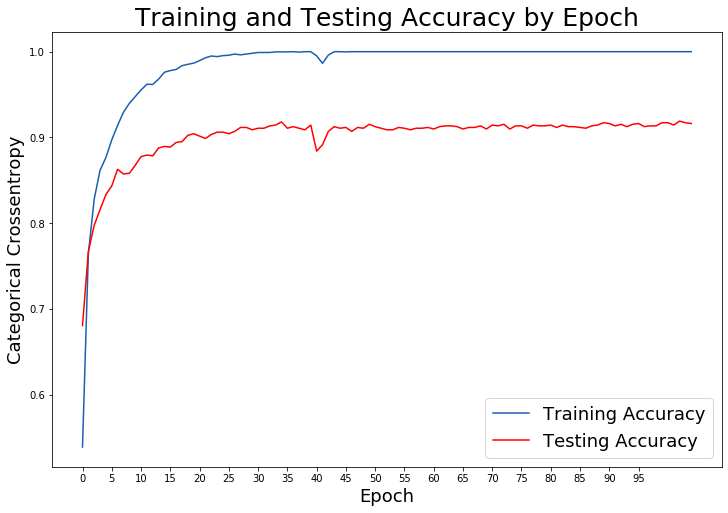

In [383]:
# Check out our train accuracy and test accuracy over epochs.
from sklearn import metrics 
train_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(test_accuracy, label='Testing Accuracy', color='red')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))

plt.legend(fontsize = 18);
plt.show()

In [396]:
from sklearn.metrics import confusion_matrix, accuracy_score
Predict_For_Ensemble = ann.predict_classes(X_test)


In [397]:
Predict_For_Ensemble

array([8, 2, 7, ..., 5, 5, 0], dtype=int64)

In [398]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [399]:
test_set = dataset[4348:]


In [400]:
test_set

ID             Class
4348  7008             siren
4349  7009  children_playing
4350  7010        jackhammer
4351  7012          drilling
4352  7013   air_conditioner
...    ...               ...
5430  8725     engine_idling
5431  8726          dog_bark
5432  8727     engine_idling
5433  8728     engine_idling
5434  8729   air_conditioner

[1087 rows x 2 columns]

In [401]:
# add new column for predict_For_Ensemble in order to compare it with real data
test_set['Predict classes']=Predict_For_Ensemble

C:\Users\User-7\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [402]:
test_set

ID             Class  Predict classes
4348  7008             siren                8
4349  7009  children_playing                2
4350  7010        jackhammer                7
4351  7012          drilling                4
4352  7013   air_conditioner                0
...    ...               ...              ...
5430  8725     engine_idling                5
5431  8726          dog_bark                3
5432  8727     engine_idling                5
5433  8728     engine_idling                5
5434  8729   air_conditioner                0

[1087 rows x 3 columns]

In [403]:
# we will replace the integer prediction to the equivalent class using map function

In [404]:
test_set['Predict classes'] = test_set['Predict classes'].map({0:'air_conditioner',1:'car_horn',2:'children_playing',3:'dog_bark', 4: 'drilling', 5:'engine_idling',6:'gun_shot',7:'jackhammer',8:'siren',9:'street_music'})

C:\Users\User-7\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [405]:
test_set

ID             Class   Predict classes
4348  7008             siren             siren
4349  7009  children_playing  children_playing
4350  7010        jackhammer        jackhammer
4351  7012          drilling          drilling
4352  7013   air_conditioner   air_conditioner
...    ...               ...               ...
5430  8725     engine_idling     engine_idling
5431  8726          dog_bark          dog_bark
5432  8727     engine_idling     engine_idling
5433  8728     engine_idling     engine_idling
5434  8729   air_conditioner   air_conditioner

[1087 rows x 3 columns]

In [406]:
# number of classes that doesn't match 
test_set[test_set['Class']!=test_set['Predict classes']]

ID             Class   Predict classes
4360  7022  children_playing      street_music
4366  7030      street_music        jackhammer
4380  7053             siren          dog_bark
4383  7057          dog_bark          drilling
4384  7059     engine_idling             siren
...    ...               ...               ...
5416  8709          dog_bark  children_playing
5418  8711          dog_bark     engine_idling
5420  8713          dog_bark      street_music
5425  8720      street_music  children_playing
5427  8722          dog_bark          drilling

[91 rows x 3 columns]

In [407]:
# Calculating the actual test accuracy
round((1-len(test_set[test_set['Class']!=test_set['Predict classes']])/len(test_set)),2)

0.92

In [213]:
predict_ann = ann.predict_proba(X_test)
predict_ann= pd.DataFrame(predict_ann)
predict_ann.to_csv('predict_ann.csv', index=False)

In [214]:
p = pd.read_csv('predict_ann.csv')

In [215]:
p

0             1             2             3             4  \
0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1     3.097011e-09  1.448836e-15  9.993120e-01  2.884128e-13  2.264813e-11   
2     5.529526e-15  1.148627e-11  6.034612e-31  2.805630e-14  4.358809e-14   
3     2.059696e-06  3.368143e-06  1.152136e-12  6.138454e-11  9.999919e-01   
4     9.999986e-01  2.572775e-26  8.000580e-26  2.412324e-23  1.358045e-26   
...            ...           ...           ...           ...           ...   
1082  2.513012e-11  1.039909e-08  1.524667e-30  2.742890e-19  8.280167e-11   
1083  1.773818e-13  2.137576e-10  9.573359e-06  9.999635e-01  1.783279e-05   
1084  1.960007e-13  2.296457e-11  6.864706e-19  5.527997e-11  2.322817e-08   
1085  1.015235e-09  4.111496e-12  5.943337e-21  4.602177e-10  2.396962e-06   
1086  1.000000e+00  3.090746e-11  1.435269e-13  3.632463e-12  4.216738e-08   

                 5             6             7             8             9  
0     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  1.834503e-37  
1     4.912778e-18  3.520366e-25  5.042861e-19  5.069984e-10  6.879292e-04  
2     8.823464e-10  4.970609e-15  1.000000e+00  2.680106e-09  2.375421e-20  
3     1.116592e-10  9.063367e-18  2.615089e-06  4.263826e-10  3.405669e-13  
4     1.001347e-29  7.710506e-34  8.182763e-31  1.387941e-06  6.756284e-12  
...            ...           ...           ...           ...           ...  
1082  1.000000e+00  1.091916e-20  6.464385e-12  1.808705e-26  2.858891e-08  
1083  1.144785e-09  9.034437e-06  6.601905e-21  1.001348e-17  1.658207e-11  
1084  9.999999e-01  1.084177e-12  9.910133e-08  3.791812e-29  2.272352e-16  
1085  9.999976e-01  2.005242e-10  2.535154e-13  1.755632e-24  2.407136e-09  
1086  4.491792e-13  4.048161e-21  1.503075e-22  1.468212e-10  1.410070e-08  

[1087 rows x 10 columns]